In [17]:
import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%precision 4
%matplotlib inline
util.scale_plot_size(1.5)

In [55]:
sql_txt = ''' 
    select p.name, sp.year, (tau).mean as mean, (sigma).mean as std, sv.avg_score, sv.std_score
    from players p, stan_players sp, stats_view sv 
    where p.player_id = sp.player_id 
    and tag = 'top-50' 
    and sv.year = 2016 
    and sv.player_id = p.player_id
    and sv.year = sp.year
    order by sv.avg_score
    limit 50;
'''
p_df = util.pd_from_sql(sql_txt)

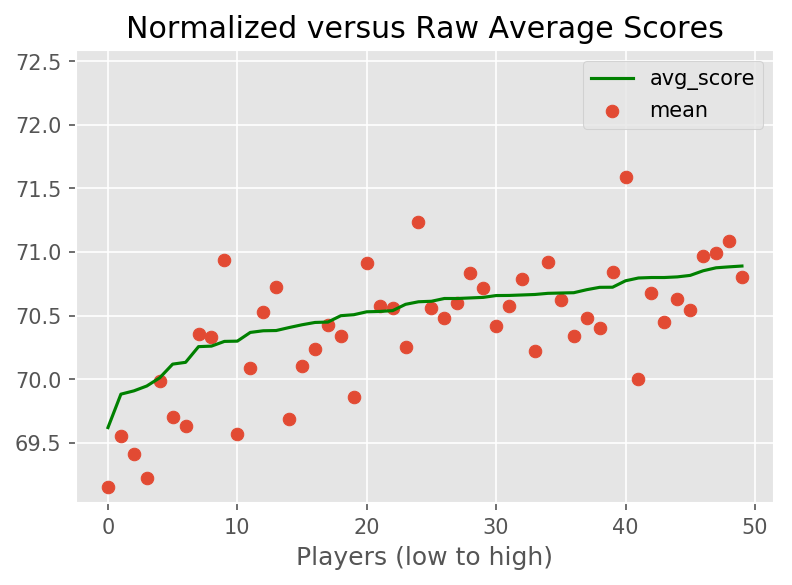

In [74]:
plt.scatter(range(0, len(p_df)), p_df['mean'])
plt.plot(range(0, len(p_df)), p_df['avg_score'], color='green')
plt.xlabel('Players (low to high)')
plt.legend(loc='upper right')
y_bottom, _ = plt.gca().get_ylim()
plt.gca().set_ylim([y_bottom,p_df['mean'].max()+1])
foo = plt.title('Normalized versus Raw Average Scores', loc='center')

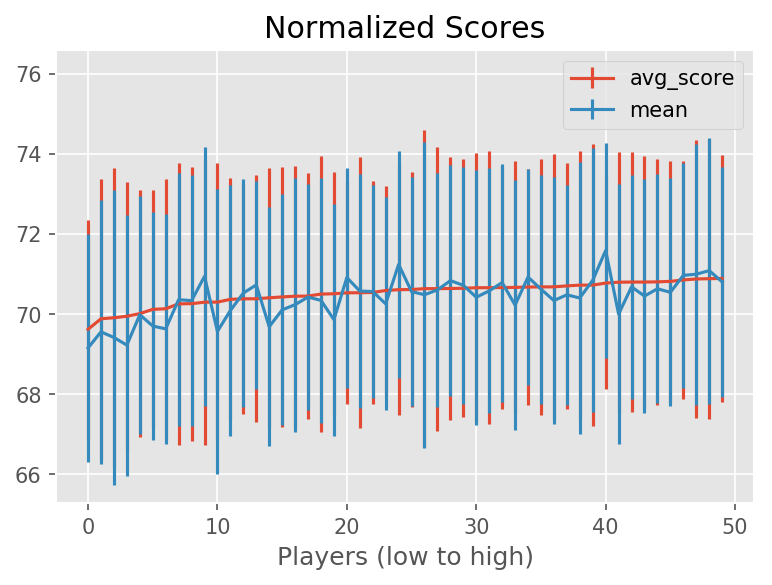

In [78]:
plt.errorbar(range(0, len(p_df)), p_df['avg_score'], p_df['std_score'])
plt.errorbar(range(0, len(p_df)), p_df['mean'], p_df['std'])
plt.xlabel('Players (low to high)')
plt.legend(loc='upper right')
y_bottom, _ = plt.gca().get_ylim()
plt.gca().set_ylim([y_bottom,p_df['mean'].max()+5])
foo = plt.title('Normalized Scores', loc='center')

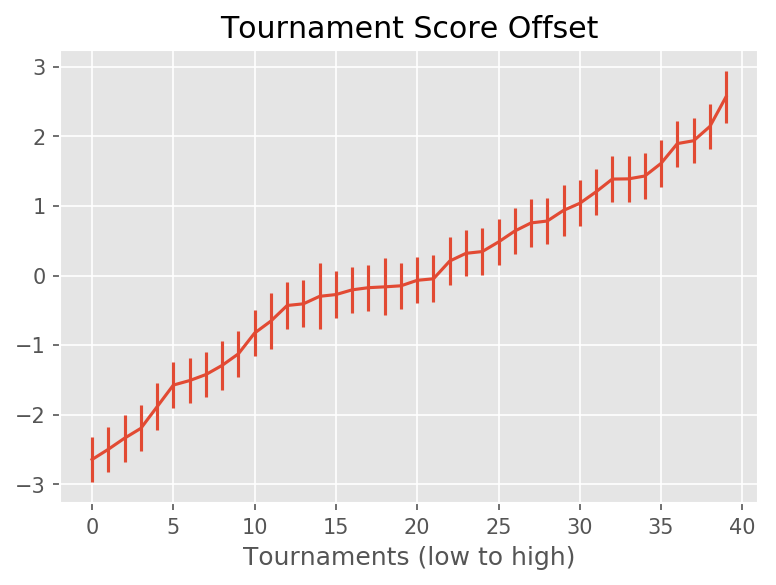

In [24]:
sql_txt = ''' 
    select name, (alpha).mean as mean, (alpha).sd as std
    from tournaments t, stan_tournaments st 
    where t.permanent_tournament_id = st.permanent_tournament_id 
    and t.year = st.year 
    and t.year = 2016 
    and tag = 'top-200' 
    order by (alpha).mean
''' 
t_df = util.pd_from_sql(sql_txt)
plt.errorbar(range(0, len(t_df)), t_df['mean'], t_df['std'])
plt.xlabel('Tournaments (low to high)')
foo = plt.title('Tournament Score Offset', loc='center')

In [ ]:
# offset = np.mean([round(means[i][0],2) for i in range(0,num_tournaments)])
# print offset
# top_players = 20
# avg_score = [round(means[i][0],2) for i in range(num_tournaments+num_players,num_tournaments+2*num_players)]
# std_score = [round(means[i][0],2) for i in range(num_tournaments,num_tournaments+num_players)]
# sqlTxt = '''
# select * from stats_view where year = 2014 limit 100; 
# '''
df = util.pd_from_sql(sqlTxt)
# foo = plt.errorbar(range(0, top_players), df['avg_score'][0:top_players], df['std_score'][0:top_players], linestyle='None', marker='^')
foo = plt.errorbar(range(0, top_players), avg_score[0:top_players] + offset, df['std_score'][0:top_players], linestyle='None', marker='^')
foo = plt.errorbar(range(0, top_players), avg_score[0:top_players] + offset, std_score[0:top_players], linestyle='None', marker='^')
print np.mean(std_score), np.mean(df['std_score']) 

In [55]:
p_df[p_df['name'] == 'Dustin Johnson']

,name,year,tag,tau,sigma,beta
29,Dustin Johnson,2014,top-200,"(70.058,0.059,0.624)","(3.653,0.013,0.435)","(0.658,0.022,0.964)"
233,Dustin Johnson,2015,top-200,"(69.598,0.036,0.508)","(3.548,0.008,0.346)","(-0.493,0.022,0.966)"
402,Dustin Johnson,2016,top-200,"(69.252,0.046,0.527)","(3.672,0.007,0.327)","(-0.485,0.022,0.962)"
602,Dustin Johnson,2016,top-50,"(69.447,0.042,0.57)","(3.688,0.007,0.331)","(-0.295,0.023,1.008)"
683,Dustin Johnson,2015,top-50,"(69.749,0.012,0.54)","(3.523,0.007,0.329)","(-0.423,0.022,0.992)"
729,Dustin Johnson,2014,top-50,"(70.105,0.015,0.659)","(3.654,0.009,0.42)","(0.678,0.021,0.956)"


In [43]:
t_df[t_df['name'] == 'THE PLAYERS Championship']

,name,year,tag,alpha
1,THE PLAYERS Championship,2014,top-200,"(1.867,0.065,0.354)"
42,THE PLAYERS Championship,2015,top-200,"(2.26,0.039,0.273)"
83,THE PLAYERS Championship,2016,top-200,"(2.007,0.049,0.311)"
123,THE PLAYERS Championship,2016,top-50,"(1.791,0.041,0.417)"
163,THE PLAYERS Championship,2015,top-50,"(2.273,0.033,0.407)"
201,THE PLAYERS Championship,2014,top-50,"(1.567,0.047,0.407)"
